# 10 January 

## Objective:
Use Python to perform a simple linear regression analysis on Canada's per capita income data,
split the data into training and testing sets, and evaluate the model. The data in .doc file is
available in VTOP.

In [27]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
df = pd.read_csv(r'C:\Users\Batch1\Downloads\24MDT0184\data.csv')

In [7]:
df

,year,per capita income (US$)
0,1970.0,3399.299037
1,1971.0,3768.297935
2,1972.0,4251.175484
3,1973.0,4804.463248
4,1974.0,5576.514583
5,1975.0,5998.144346
6,1976.0,7062.131392
7,1977.0,7100.126170
8,1978.0,7247.967035
9,1979.0,7602.912681


In [8]:
df.dropna(inplace = True)

In [9]:
df

,year,per capita income (US$)
0,1970.0,3399.299037
1,1971.0,3768.297935
2,1972.0,4251.175484
3,1973.0,4804.463248
4,1974.0,5576.514583
5,1975.0,5998.144346
6,1976.0,7062.131392
7,1977.0,7100.126170
8,1978.0,7247.967035
9,1979.0,7602.912681


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47 entries, 0 to 46
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   year                     47 non-null     float64
 1   per capita income (US$)  47 non-null     float64
dtypes: float64(2)
memory usage: 1.1 KB


In [11]:
df['year'] = df['year'].astype('int')

In [17]:
x = df['year'].values.reshape(-1,1)
y = df['per capita income (US$)'].values

In [20]:
## Train test split 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

model = LinearRegression()
model.fit(x_train,y_train)

income_2025 = model.predict([[2025]])
print(f"Predicted per capita income for 2025: ${income_2025[0]:,.2f}")

Predicted per capita income for 2025: $45,103.39


In [24]:
y_pred = model.predict(x_test)
mse_test = mean_squared_error(y_test,y_pred)
# Calculate the R-squared value on the testing set
r2_test = model.score(x_test,y_test)
print(f"Testing Set Mean Squared Error: {mse_test:.2f}")
print(f"Testing Set R-squared: {r2_test:.2f}")

Testing Set Mean Squared Error: 15147815.55
Testing Set R-squared: 0.88


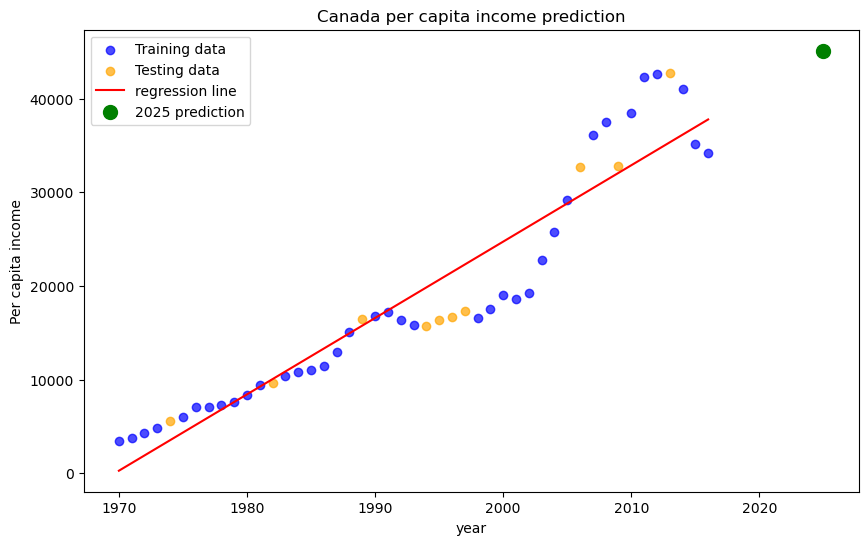

In [28]:
# visualizing the training data, test data, and the regression model
plt.figure(figsize = (10,6))
#scatter plot of training data
plt.scatter(x_train,y_train,color = 'blue',label = 'Training data', alpha=0.7)
#scatter plot of testing data
plt.scatter(x_test,y_test,color = 'orange',label = 'Testing data', alpha=0.7)
#ploting the regresssion line 
plt.plot(x,model.predict(x),color = 'red',label = 'regression line')
plt.scatter([[2025]], income_2025,color = 'green',label = '2025 prediction', zorder = 5, marker = 'o', s = 100)
plt.xlabel('year')
plt.ylabel("Per capita income")
plt.title("Canada per capita income prediction")
plt.legend()
plt.show()